In [1]:
import sys,os,os.path
sys.path.append("../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import numpy  as np
import pandas as pd
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from invisible_cities.database.load_db  import DataPMT, DataSiPM, SiPMNoise
from invisible_cities.io      .pmaps_io import load_pmaps

In [3]:
detector = "next100"

dbpmt  = DataPMT (detector, 0)
dbsipm = DataSiPM(detector, 0)
# noise_probs, noise_xbins, noise_baselines = SiPMNoise(detector, 0)

In [4]:
dbsipm

,SensorID,ChannelID,Active,X,Y,adc_to_pes,Sigma
0,1000,1013,1,-482.625,-294.825,17.25,1.677
1,1001,1012,1,-482.625,-279.275,17.25,1.677
2,1002,1015,1,-482.625,-263.725,17.25,1.677
3,1003,1014,1,-482.625,-248.175,17.25,1.677
4,1004,1029,1,-482.625,-232.625,17.25,1.677
...,...,...,...,...,...,...,...
3579,56059,56054,1,490.025,245.425,17.25,1.677
3580,56060,56037,1,490.025,260.975,17.25,1.677
3581,56061,56036,1,490.025,276.525,17.25,1.677
3582,56062,56039,1,490.025,292.075,17.25,1.677


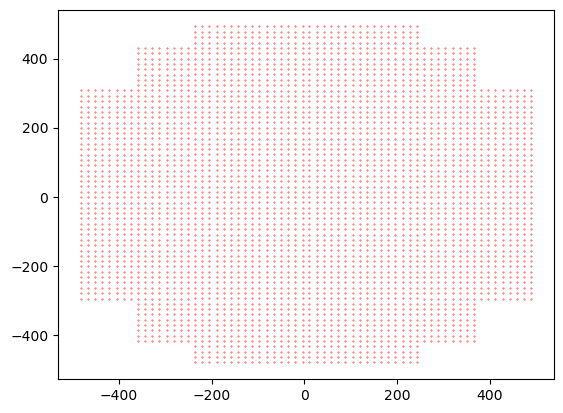

In [5]:
plt.scatter(dbsipm.X, dbsipm.Y, c='r', s=0.1)

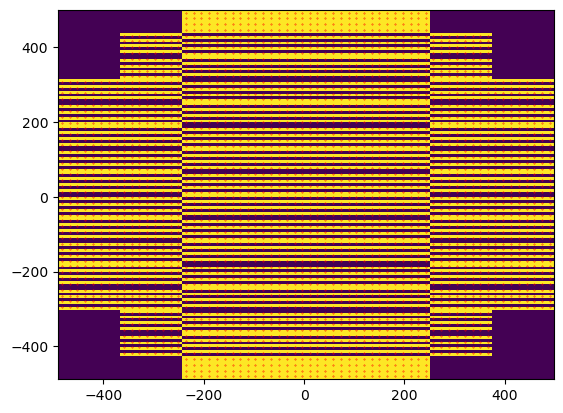

In [6]:
x_unique = np.unique(dbsipm.X)
y_unique = np.unique(dbsipm.Y)

# Get the index that each x-value has in the array of unique values
x_index = np.searchsorted(x_unique, dbsipm.X)
y_index = np.searchsorted(y_unique, dbsipm.Y)

square = np.zeros((len(x_unique), len(y_unique)))
square[x_index, y_index] = 1.0

X, Y = np.meshgrid(x_unique, y_unique)
# show the matrix
plt.pcolormesh(X, Y, square.T, shading="nearest")
plt.scatter(dbsipm.X, dbsipm.Y, c="r", s=0.1)
# plt.xlim((-450, -420))
# plt.ylim((180, 210))
plt.show()

## MC True Waveforms
The true waveforms that come out of `nexus` after running Buffy (fullsim) or Detsim (fast sim). These do not include any effects of the electronics (e.g. noise).

In [135]:
# filename = "/Volumes/LaCie/NEXT/NEXTNEW_MC/Calibration/NEXT_v1_05_02_NEXUS_v5_07_10_bkg_v9/mcrd/output/Tl208_NEW_v1_05_02_nexus_v5_07_10-10.1bar_Tl208_v9.0_mcrd.h5"

# filename = "/Volumes/LaCie/NEXT/NEXTNEW_MC/0nubb/NEXT_v1_05_02_NEXUS_v5_07_00_bkg_v9/mcrd/output/data/bb0nu_NEW_10.1bar_v1_05_02_nexus_v5_07_00.mcrd_0.h5"

# filename = "/Volumes/LaCie/NEXT/NEXTNEW_MC/Calibration/NEXUS_v5_07_01/nexus/Tl208_INTERNAL_PORT_UPPER.0.next"
# filename = "/Users/trettin/software/NEXT/waveform_processing/output/nexus_fullsim/Tl208_INTERNAL_PORT_UPPER.FULLSIM.seed2802740.0.next.h5"
# filename = "/Users/trettin/software/NEXT/waveform_processing/output/nexus_fastsim/Tl208_INTERNAL_PORT_UPPER.FASTSIM.seed2.0.next.h5"

# filename = "/Users/trettin/software/NEXT/waveform_processing/output/buffy/Tl208_INTERNAL_PORT_UPPER.FULLSIM.seed2802740.0.next.h5"
# filename = "/Volumes/T7/DenseFlex/kr83m/s1.3mmp3.5mm/hdf5/flex.0vbb.0.nexus.h5"

# filename = "/Users/trettin/software/NEXT/waveform_processing/output/buffy/s3mmp55mm/flex.0vbb.0.nexus.h5"
# filename = "/Users/trettin/software/NEXT/waveform_processing/output/buffy/s6mmp11mm/0vbb/flex.0vbb.0.nexus.h5"

filename = "/Users/trettin/Library/Mobile Documents/com~apple~CloudDocs/Documents/Coding Stuff/waveform_processing/output/NEW_calibration/detsim/NEW_calib_detsim.h5"
with tb.open_file(filename) as file:
    print(file)

/Users/trettin/Library/Mobile Documents/com~apple~CloudDocs/Documents/Coding Stuff/waveform_processing/output/NEW_calibration/detsim/NEW_calib_detsim.h5 (File) ''
Last modif.: '2024-11-21T13:25:40+00:00'
Object Tree: 
/ (RootGroup) ''
/pmtrd (EArray(7, 12, 800000)shuffle, zlib(4)) ''
/sipmrd (EArray(7, 1792, 800)shuffle, zlib(4)) ''
/Filters (Group) ''
/Filters/active_hits (Table(7,)shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/dark_events (Table(7,)shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/signal (Table(7,)shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/configuration (Table(43,)shuffle, zlib(4)) ''
/MC/event_mapping (Table(7,)shuffle, zlib(4)) ''
/MC/hits (Table(2644,)shuffle, zlib(4)) ''
/MC/particles (Table(602,)shuffle, zlib(4)) ''
/MC/sns_positions (Table(0,)shuffle, zlib(4)) ''
/MC/sns_response (Table(0,)shuffle, zlib(4)) ''
/Run (Group) ''
/Run/eventMap (Table(7,)shuffle, zlib(4)) 'event & nexus evt for each index'
/Run/events (Tab

In [136]:
with tb.open_file(filename) as file:
    configurations = file.root.MC.configuration[:]

In [138]:
with tb.open_file(filename) as file:
    pmtrd = file.root.pmtrd[:]
    sipmrd = file.root.sipmrd[:]
    mc_hits = pd.DataFrame(file.root.MC.hits[:])
    particles = pd.DataFrame(file.root.MC.particles[:])


In [139]:
particles.groupby("event_id").get_group(2)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
156,2,1,b'Tl208',True,0,-1.824865,316.738770,277.079590,0.000000,-1.824865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,b'none',b'Radioactivation'
157,2,4,b'e-',False,1,-1.824865,316.738770,277.079590,0.000302,-1.824970,...,-0.064624,0.125790,0.078032,-0.000000,0.000000,-0.000000,0.024919,2.078751e-02,b'Radioactivation',b'eIoni'
158,2,3,b'anti_nu_e',False,1,-1.824865,316.738770,277.079590,0.000302,-12500.000000,...,-1.669212,0.362008,-0.419946,-1.669212,0.362008,-0.419946,1.758884,1.316959e+04,b'Radioactivation',b'Transportation'
159,2,2,b'Pb208[3197.711]',False,1,-1.824865,316.738770,277.079590,0.000302,-1.824865,...,1.733835,-0.487798,0.341914,0.000000,-0.000000,0.000000,0.000009,0.000000e+00,b'Radioactivation',b'Radioactivation'
160,2,6,b'gamma',False,2,-1.824865,316.738770,277.079590,0.000302,-6.250862,...,-0.041298,-0.580947,0.030048,-0.000000,-0.000000,-0.000000,0.583188,1.966231e+01,b'Radioactivation',b'phot'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,42,b'e-',False,28,58.019108,0.570760,181.612289,1.189199,56.458431,...,-0.434651,-0.190455,-0.286696,0.000000,-0.000000,-0.000000,0.242997,1.960778e+01,b'eIoni',b'eIoni'
214,2,27,b'e-',False,24,-1.115571,311.418121,275.019623,0.019480,-1.115571,...,0.003870,0.004173,-0.005437,0.000000,-0.000000,-0.000000,0.000061,8.079326e-08,b'compt',b'msc'
215,2,26,b'e-',False,24,-1.115571,311.418121,275.019623,0.019480,-1.115571,...,0.005105,-0.001281,-0.001909,0.000000,-0.000000,-0.000000,0.000031,5.747247e-08,b'compt',b'msc'
216,2,25,b'e-',False,24,-1.115571,311.418121,275.019623,0.019480,-1.116428,...,-0.121129,-0.003855,-0.184988,-0.000000,0.000000,-0.000000,0.045802,6.511949e-03,b'compt',b'eIoni'


/var/folders/8w/ks79glvd1zd67hflttnkhsrh0000gn/T/ipykernel_40905/1973198331.py:59: RuntimeWarning: invalid value encountered in divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/var/folders/8w/ks79glvd1zd67hflttnkhsrh0000gn/T/ipykernel_40905/1973198331.py:60: RuntimeWarning: invalid value encountered in divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


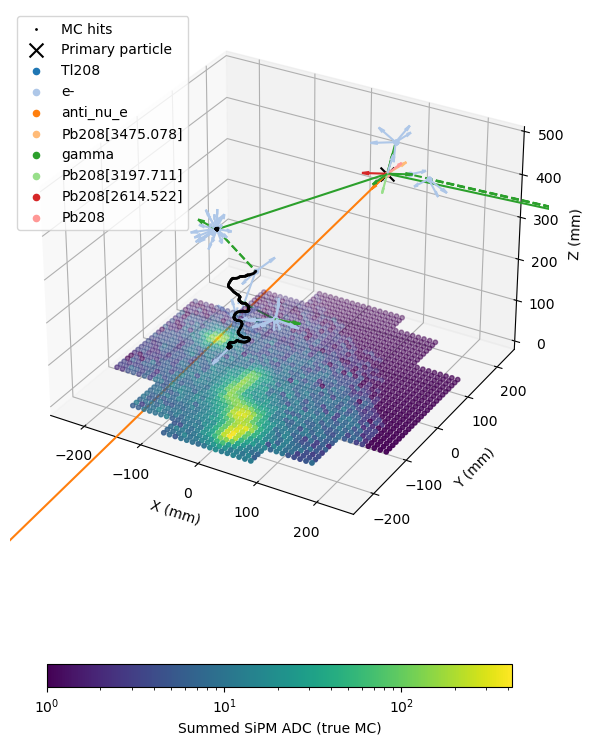

In [143]:
from matplotlib.colors import LogNorm

evt = 5
sipm_intensity = sipmrd[evt].sum(axis=1)
hits_xyz = mc_hits.groupby("event_id").get_group(evt)[["x", "y", "z"]].values
event_particles = particles.groupby("event_id").get_group(evt)
unique_particles = event_particles["particle_name"].unique()
# make a dictionary with one unique color for each particle
colors = dict(zip(unique_particles, plt.cm.tab20.colors))
primary_xyz = event_particles.loc[event_particles["primary"] == True][
    ["initial_x", "initial_y", "initial_z"]
].values
primary_name = event_particles.loc[event_particles["primary"] == True][
    "particle_name"
].values[0]
primary_color = colors[primary_name]

# Scatter plot the sipm positions with the PE values
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    dbsipm.X,
    dbsipm.Y,
    np.zeros_like(dbsipm.X),
    c=sipm_intensity + 1,
    # c="gray",
    s=10.0,
    norm=LogNorm(),
)
ax.scatter(hits_xyz[:, 0], hits_xyz[:, 1], hits_xyz[:, 2], c='k', s=1, label="MC hits")
# get current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
z_min, z_max = ax.get_zlim()
# Plot the primary particle
ax.scatter(
    primary_xyz[0][0],
    primary_xyz[0][1],
    primary_xyz[0][2],
    c="k",
    s=100,
    marker="x",
    label="Primary particle",
)
# Plot all the particles
# Add a legend item for each unique particle
for particle_name, color in colors.items():
    ax.scatter([], [], c=[color], label=particle_name.decode("utf-8"))

ax.legend()
event_particles_grouped = event_particles.groupby("particle_id")
for i, pid in enumerate(event_particles["particle_id"].unique()):
    length = event_particles_grouped.get_group(pid)["length"].values[0]
    init_xyz = event_particles_grouped.get_group(pid)[["initial_x", "initial_y", "initial_z"]].values[0]
    final_xyz = event_particles_grouped.get_group(pid)[["final_x", "final_y", "final_z"]].values[0]
    initial_momentum_xyz = event_particles_grouped.get_group(pid)[["initial_momentum_x", "initial_momentum_y", "initial_momentum_z"]].values[0]
    final_momentum_xyz = event_particles_grouped.get_group(pid)[["final_momentum_x", "final_momentum_y", "final_momentum_z"]].values[0]
    # normalize momenta
    initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
    final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
    pname = event_particles_grouped.get_group(pid)["particle_name"].values[0]
    # If the length is smaller than 1 mm, we make a scatter plot of the initial position.
    if length < 1.0:
        ax.scatter(init_xyz[0], init_xyz[1], init_xyz[2], color=colors[pname], s=10)
    else:
        ax.plot(
            [init_xyz[0], final_xyz[0]],
            [init_xyz[1], final_xyz[1]],
            [init_xyz[2], final_xyz[2]],
            c=colors[pname],
        )
    # Add small arrows to indicate the direction of the particle at the start and end
    ax.quiver(
        init_xyz[0],
        init_xyz[1],
        init_xyz[2],
        initial_momentum_xyz[0],
        initial_momentum_xyz[1],
        initial_momentum_xyz[2],
        color=colors[pname],
        length=40,
    )
    ax.quiver(
        final_xyz[0],
        final_xyz[1],
        final_xyz[2],
        final_momentum_xyz[0],
        final_momentum_xyz[1],
        final_momentum_xyz[2],
        color=colors[pname],
        length=40,
    )
    mother_id = event_particles_grouped.get_group(pid)["mother_id"].values[0]
    # plot a thin dashed line from the mother particle to the current particle
    if mother_id != 0:
        mother_xyz = event_particles_grouped.get_group(mother_id)[["final_x", "final_y", "final_z"]].values[0]
        mother_name = event_particles_grouped.get_group(mother_id)["particle_name"].values[0]
        ax.plot(
            [mother_xyz[0], init_xyz[0]],
            [mother_xyz[1], init_xyz[1]],
            [mother_xyz[2], init_xyz[2]],
            c=colors[mother_name],
            linestyle="--",
        )
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation="horizontal", shrink=0.6)
cbar.set_label("Summed SiPM ADC (true MC)")
# reset axis limits
# ax.set_xlim(x_min, x_max)
# ax.set_ylim(y_min, y_max)
# ax.set_zlim(z_min, z_max)
ax.set_xlim((-250, 250))
ax.set_ylim((-250, 250))
ax.set_zlim((-10, 500))
plt.savefig("notebook_output/NEW_calib_events/event_5.png")
plt.show()

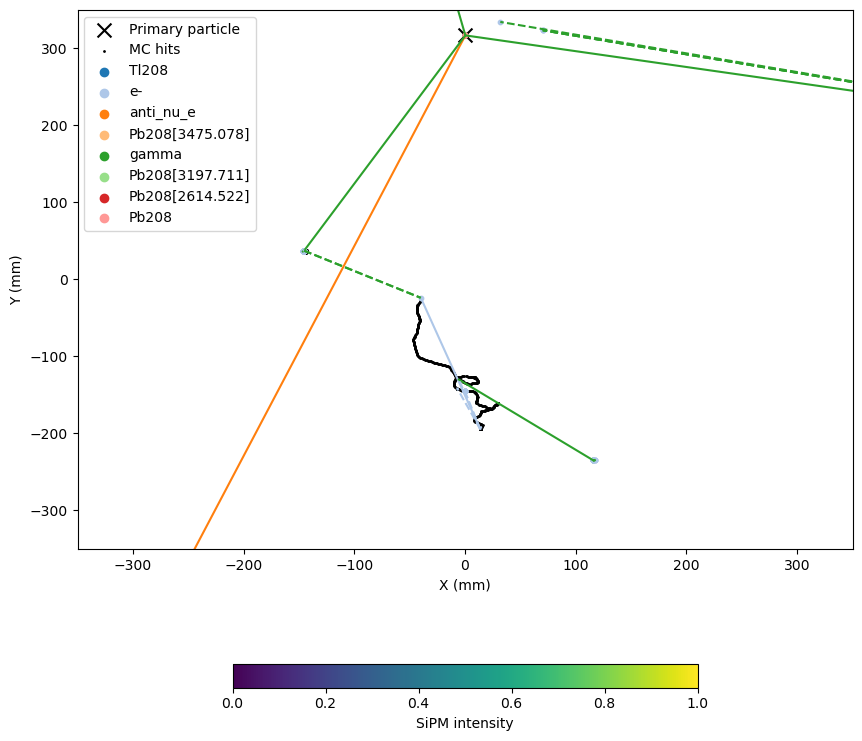

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(dbsipm.X, dbsipm.Y, c=sipm_intensity + 1, s=10.0, norm=LogNorm())
ax.scatter(primary_xyz[0][0], primary_xyz[0][1], c="k", s=100, marker="x", label="Primary particle")
ax.scatter(hits_xyz[:, 0], hits_xyz[:, 1], c='k', s=1, label="MC hits")

# Add a legend item for each unique particle
for particle_name, color in colors.items():
    ax.scatter([], [], c=[color], label=particle_name.decode("utf-8"))
# Plot all particles
for i, pid in enumerate(event_particles["particle_id"].unique()):
    length = event_particles_grouped.get_group(pid)["length"].values[0]
    init_xyz = event_particles_grouped.get_group(pid)[["initial_x", "initial_y"]].values[0]
    final_xyz = event_particles_grouped.get_group(pid)[["final_x", "final_y"]].values[0]
    pname = event_particles_grouped.get_group(pid)["particle_name"].values[0]
    if length < 1.0:
        ax.scatter(init_xyz[0], init_xyz[1], color=colors[pname], s=10)
    else:
        ax.plot(
            [init_xyz[0], final_xyz[0]],
            [init_xyz[1], final_xyz[1]],
            c=colors[pname],
        )
    mother_id = event_particles_grouped.get_group(pid)["mother_id"].values[0]
    if mother_id != 0:
        mother_xyz = event_particles_grouped.get_group(mother_id)[["final_x", "final_y"]].values[0]
        mother_name = event_particles_grouped.get_group(mother_id)["particle_name"].values[0]
        ax.plot(
            [mother_xyz[0], init_xyz[0]],
            [mother_xyz[1], init_xyz[1]],
            c=colors[mother_name],
            linestyle="--",
        )

ax.legend()
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation="horizontal", shrink=0.6)
cbar.set_label("SiPM intensity")
ax.set_xlim((-350, 350))
ax.set_ylim((-350, 350))
plt.show()

Text(0, 0.5, 'Summed PMT Counts')

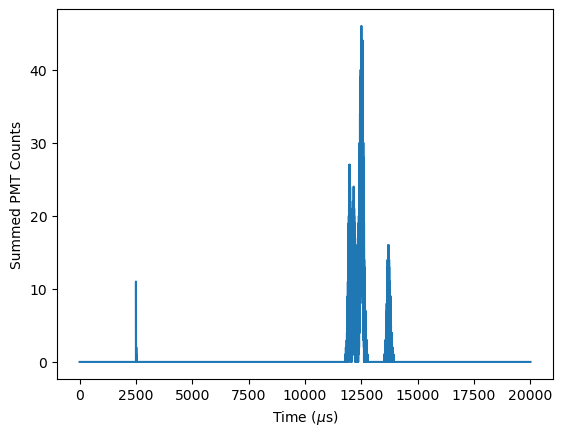

In [19]:
evt = 2
# convert to us
x = np.arange(len(pmtrd[0][0])) / 40
y = np.sum(pmtrd[evt], axis=0)
plt.plot(x, y)
plt.xlabel("Time ($\\mu$s)")
plt.ylabel("Summed PMT Counts")


Text(0, 0.5, 'Summed ADC over SiPMs')

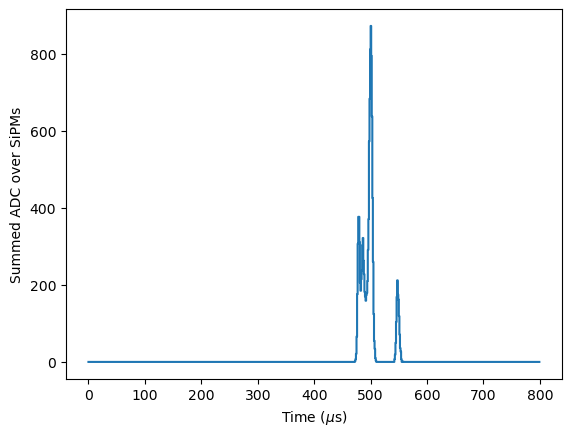

In [20]:
# plot the first event
x_sipm = np.arange(len(sipmrd[0][0]))
y_sipm = sipmrd[evt].sum(axis=0)
plt.step(x_sipm, y_sipm, where="post")
# The sipm waveforms are already binned in 1 us bins
plt.xlabel("Time ($\\mu$s)")
# These are true PE values
plt.ylabel("Summed ADC over SiPMs")
# plt.xlim((195, 205))
# plt.ylim((0, 50))
# plt.ylim((0, 10))

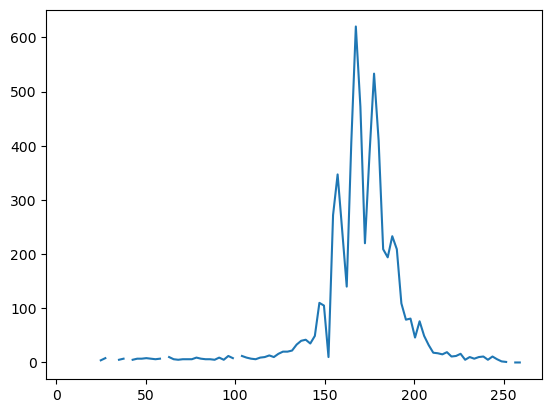

In [21]:
from scipy.stats import binned_statistic

sipm_radii = np.sqrt(dbsipm.X**2 + dbsipm.Y**2)
# Get the maximum in each radial bin
max_sipm = binned_statistic(sipm_radii, sipm_intensity, statistic="max", bins=100)

plt.plot(max_sipm.bin_edges[:-1], max_sipm.statistic)

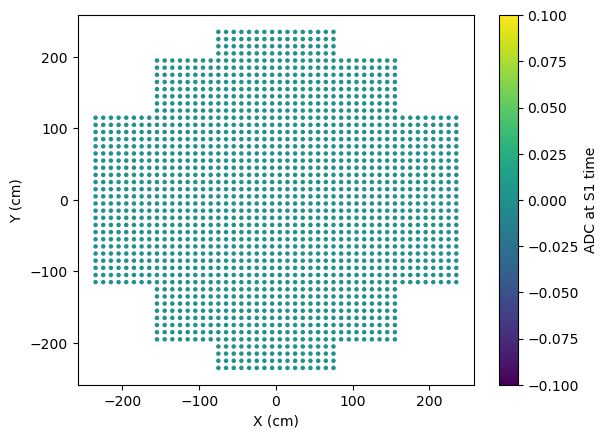

In [22]:
# Scatter plot the sipm positions with the PE values
plt.scatter(dbsipm.X, dbsipm.Y, c=sipmrd[evt][:, 200], s=5)
cbar = plt.colorbar()
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")
# label the colorbar 
cbar.set_label("ADC at S1 time")
plt.show()

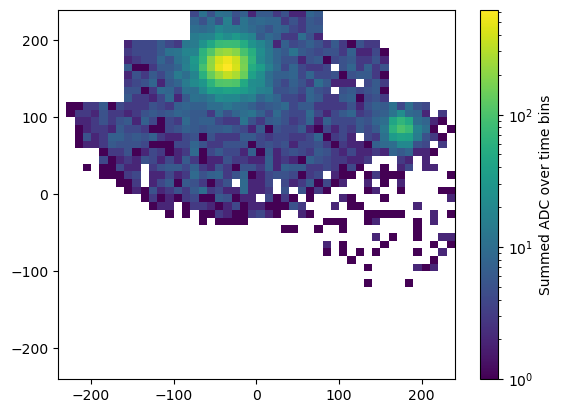

In [23]:
from matplotlib.colors import LogNorm

# Impute zeros to make the matrix square
square_intensity = np.zeros((len(x_unique), len(y_unique)))
square_intensity[x_index, y_index] = sipmrd[evt].sum(axis=1)
X, Y = np.meshgrid(x_unique, y_unique)
# show the matrix
plt.pcolormesh(X, Y, square_intensity.T, shading="nearest", norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label("Summed ADC over time bins")

In [95]:
# Now we can analyze the spacial frequencies that make up the image.
from scipy import fftpack as fft
F1 = fft.fft2(square_intensity)
# Shift the zero frequency component to the center
F2 = fft.fftshift(F1)
# Calculate the magnitude
magnitude_spectrum = np.abs(F2)

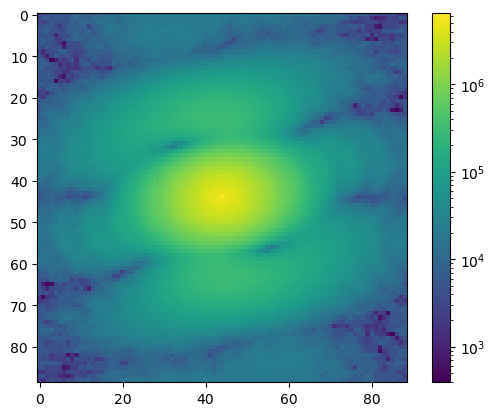

In [96]:
# show magnitude
plt.imshow(magnitude_spectrum, norm=LogNorm())
plt.colorbar()
plt.show()


In [98]:
from scipy.stats import binned_statistic

# Create a radial profile of the magnitude spectrum
center = np.array(magnitude_spectrum.shape) // 2
y, x = np.indices(magnitude_spectrum.shape)
r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
statistic = "max"
# Compute the mean of each radial bin. 
# The bin width is 1.0
radial_profile = binned_statistic(r.ravel(), magnitude_spectrum.ravel(), statistic=statistic, bins=100)[0]
# Ignore first bin (this is just the overall mean) 
radial_profile = radial_profile[1:]
# Get the 99% quantile of the radial profile
total_weight = np.sum(radial_profile)
quantile = 0.95   # type: float
# Get index of the quantile using the cumulative sum
cumsum = np.cumsum(radial_profile) / total_weight # type: np.ndarray
quantile_index = np.searchsorted(cumsum, quantile)
print(f"{quantile*100:.3g}% quantile index: {quantile_index}")

95% quantile index: 37


Exp-law fit: a=5.12e+06, b=-0.0703, c=-0.000554


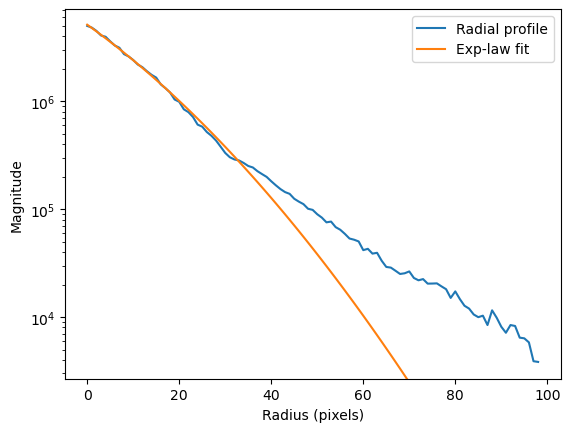

In [99]:
# Fit a power-law to the radial profile
from scipy.optimize import curve_fit

def exp_law(r, a, b, c):
    return a * np.exp(b * r + c * r**2)

# Fit the power-law to the radial profile
popt, pcov = curve_fit(exp_law, np.arange(len(radial_profile)), radial_profile, p0=[np.max(radial_profile), 0.0, 0.0])
print(f"Exp-law fit: a={popt[0]:.3g}, b={popt[1]:.3g}, c={popt[2]:.3g}")

# Plot the radial profile with the fit
plt.semilogy(radial_profile, label="Radial profile")
# get current y-limits
ymin, ymax = plt.ylim()
plt.semilogy(exp_law(np.arange(len(radial_profile)), *popt), label="Exp-law fit")
plt.ylim((ymin, ymax))
plt.xlabel("Radius (pixels)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

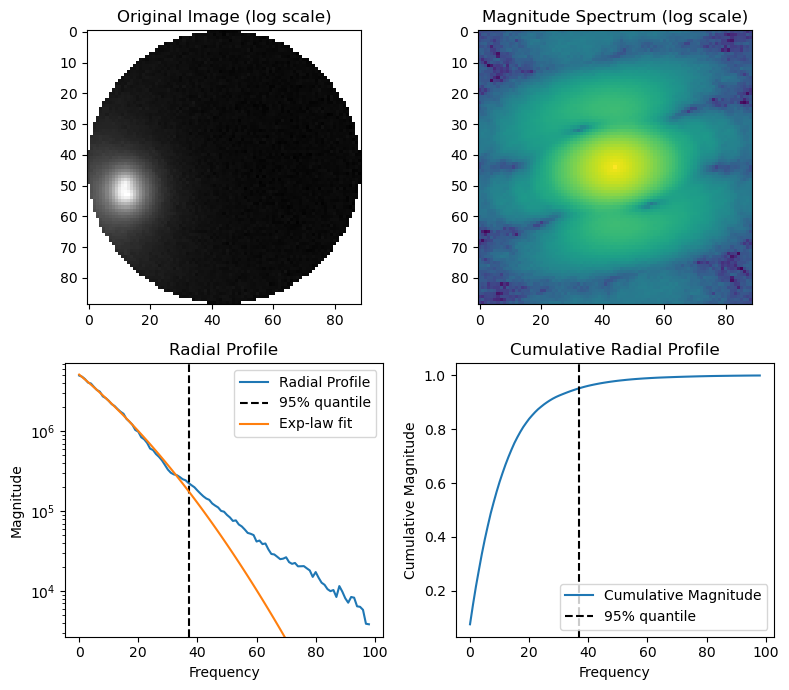

In [100]:
plt.figure(figsize=(8, 7))

plt.subplot(221)
plt.imshow(square_intensity, cmap='gray', norm=LogNorm())
plt.title('Original Image (log scale)')

plt.subplot(222)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='viridis')
plt.title('Magnitude Spectrum (log scale)')

plt.subplot(223)
plt.semilogy(radial_profile, label='Radial Profile')
y_lim = plt.ylim()
plt.axvline(quantile_index, color='k', linestyle='--', label=f'{quantile*100:.3g}% quantile')
# Plot the fit as well
plt.semilogy(exp_law(np.arange(len(radial_profile)), *popt), label="Exp-law fit")
plt.ylim(y_lim)
plt.title('Radial Profile')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(224)
plt.plot(cumsum, label='Cumulative Magnitude')
plt.axvline(quantile_index, color='k', linestyle='--', label=f'{quantile*100:.3g}% quantile')
plt.title('Cumulative Radial Profile')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Cumulative Magnitude')

plt.tight_layout()
plt.show()

Expected SiPM Noise per bin: 144.05231922864908
Expected SiPM Noise per bin (normalized): 144.05231922864908


Text(0, 0.5, 'Normalized Summed Counts')

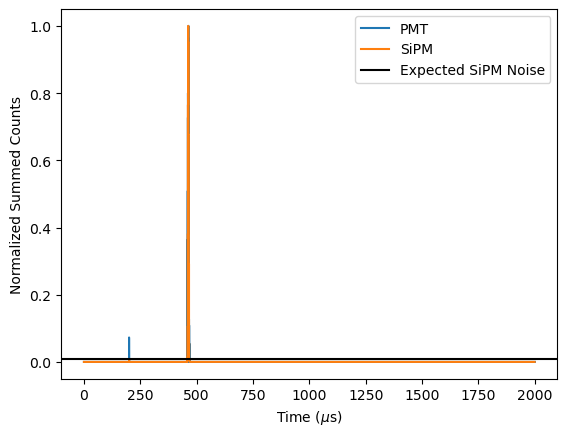

In [271]:
# Plot Sipm and PMT waveforms together, divide by maximum to get them on the same scale
sipm_noise_25c = 0.4 * 1e6 # unit is Hz, baseline noise at 25C
# noise reduced by ∼1.6 every 5K
target_temperature = -20
cooling = 1.6
delta_temperature = target_temperature - 25
sipm_noise = sipm_noise_25c * cooling ** (delta_temperature / 5)
# one bin is one microsecond
sipm_noise_per_bin = sipm_noise / 1e6
# expected summed noise, i.e. noise time number of sipms
sipm_noise_per_bin = sipm_noise_per_bin * len(dbsipm)
print(f"Expected SiPM Noise per bin: {sipm_noise_per_bin}")
plt.step(x, y / np.max(y), where="post", label="PMT")
x_sipm = np.arange(len(sipmrd[0][0]))
y_sipm = sipmrd[evt].sum(axis=0) / np.max(sipmrd[evt].sum(axis=0))
plt.step(x_sipm, y_sipm, where="post", label="SiPM")
# draw a horizontal line where we expect the noise to be
sipm_noise_per_bin_normed = sipm_noise_per_bin / np.max(sipmrd[evt].sum(axis=0))
print(f"Expected SiPM Noise per bin (normalized): {sipm_noise_per_bin}")
plt.axhline(sipm_noise_per_bin_normed, color="black", label="Expected SiPM Noise")
plt.legend()
plt.xlabel("Time ($\\mu$s)")
plt.ylabel("Normalized Summed Counts")
# plt.xlim((195, 205))
# plt.ylim((0, 0.1))

In [273]:
s1_count = sipmrd[evt].sum(axis=0)[200]
print(f"Number of PE in S1: {s1_count}")
print(f"Expected noise in bin: {sipm_noise_per_bin}")

Number of PE in S1: 52
Expected noise in bin: 144.05231922864908


### Bayesian S1 search
We will try to find S1 in the SiPM waveform. Given the noise rate, this can only have a chance if we already have a prior telling us where we expect the S1 peak to be (for instance, by analyzing the degree of diffusion of the signal on the SiPM plane). We assume that the S1 signal is just one bin wide, which is reasonable given 1 us bins. The prior will be given as a normalized array of numbers, given the prior probability in each bin. For now, we don't care how we arrived at that prior. 

For every bin, we have two hypotheses to consider: Background-only, and signal+background. We treat every bin as an independent counting experiment with Poisson probabilities:
$$P(k|\mu) = \frac{\mu^k e^{-\mu}}{k!}$$
The Likelihood Ratio between two hypotheses given some count is
$$LR(k, \mu, \alpha)=\frac{P(k|\mu + \alpha)}{P(k|\mu)} = \frac{(\mu + \alpha)^k e^{-\alpha}}{\mu^k}\;,$$
where $\mu$ is the background and $\alpha$ the signal expectation.

If we want to get the bin-wise posterior probability with the correct normalization, we need to take all $N$ bins into account. We define the true index of the signal as $I_s$ and the prior that the signal is in bin $i$ as $P(i=I_s)$. The array of all observations is $\mathbf{k}$, and the observation in bin $i$ is $k_i$. We want to calculate the posterior probability that the signal is in some bin $i$ given all of the observations, $P(i=I_s|\mathbf{k})$. After applying Bayes' theorem and some algebra, we find that 

$$ P(i=I_s|\mathbf{k}) = LR(k_i,\mu,\alpha)\frac{P(i=I_s)}{\sum_{j=1}^N LR(k_j, \mu, \alpha) P(j=I_s)}\;,$$

which is trivially normalized to one.

In [38]:
# Implement the posterior probability calculation using logarithms for numerical stability

def LogLR(k, mu, alpha):
    numerator = np.log(mu + alpha) * k - alpha
    denominator = np.log(mu) * k
    return numerator - denominator

def posterior_probability(k, mu, alpha, prior):
    # The LR funcion already broadcasts over the k values
    log_lr_values = LogLR(k, mu, alpha)
    log_posterior = log_lr_values + np.log(prior)
    posterior = np.exp(log_posterior)
    # Normalize the posterior
    posterior /= np.sum(posterior)
    return posterior

In [39]:
# Let's assume that we have a flat prior over N bins.
N = 20
prior = np.array([1 / N] * N)

# The signal is observed in one bin, in the other bins we get only background counts
alpha = s1_count
mu = sipm_noise_per_bin
k = np.array([mu] * N)
k[0] += alpha
print(f"Counts in each bin: {k}")
posterior = posterior_probability(k, mu, alpha, prior)
print(f"Prior probabilities: {prior}")
print(f"Posterior probabilities: {posterior}")
print(f"Posterior sum: {np.sum(posterior)}")

Counts in each bin: [194.05231923 144.05231923 144.05231923 144.05231923 144.05231923
 144.05231923 144.05231923 144.05231923 144.05231923 144.05231923
 144.05231923 144.05231923 144.05231923 144.05231923 144.05231923
 144.05231923 144.05231923 144.05231923 144.05231923 144.05231923]
Prior probabilities: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Posterior probabilities: [9.99993561e-01 3.38897263e-07 3.38897263e-07 3.38897263e-07
 3.38897263e-07 3.38897263e-07 3.38897263e-07 3.38897263e-07
 3.38897263e-07 3.38897263e-07 3.38897263e-07 3.38897263e-07
 3.38897263e-07 3.38897263e-07 3.38897263e-07 3.38897263e-07
 3.38897263e-07 3.38897263e-07 3.38897263e-07 3.38897263e-07]
Posterior sum: 0.9999999999999996


Text(0, 0.5, 'Probability')

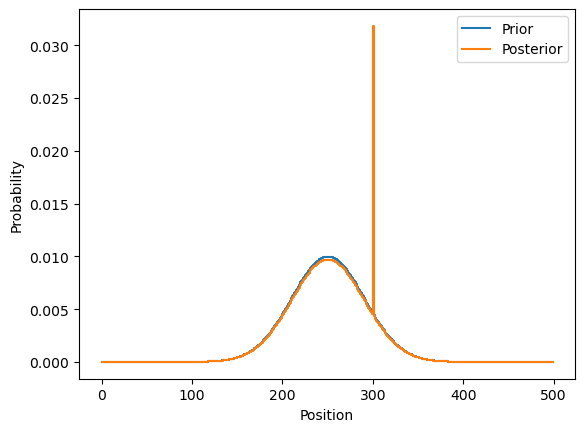

In [288]:
# Let's try a Gaussian prior
total_range = 500
prior_sigma = 40
prior_mean = 250
prior = np.exp(-0.5 * ((np.arange(total_range) - prior_mean) / prior_sigma) ** 2)
prior = prior / np.sum(prior)

plt.step(np.arange(total_range), prior, where="post", label="Prior")

signal_position = 300
alpha = s1_count / 3
mu = sipm_noise_per_bin
k = np.array([mu] * total_range)
k[signal_position] += alpha
posterior = posterior_probability(k, mu, alpha, prior)
plt.step(np.arange(total_range), posterior, where="post", label="Posterior")
plt.legend()
plt.xlabel("Position")
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

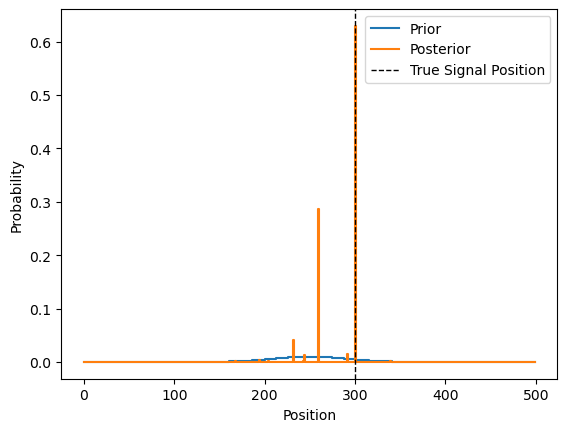

In [291]:
# Same prior, but this time we add Poisson noise instead of just a flat background
alpha = s1_count
mu = sipm_noise_per_bin
np.random.seed(0)
noise_experiment = np.random.poisson(mu, total_range)
k = noise_experiment
k[signal_position] += alpha
posterior = posterior_probability(k, mu, alpha, prior)
plt.step(np.arange(total_range), prior, where="post", label="Prior")
plt.step(np.arange(total_range), posterior, where="post", label="Posterior")
plt.axvline(signal_position, color="black", label="True Signal Position", linestyle="--", lw=1)
plt.legend()
plt.xlabel("Position")
plt.ylabel("Probability")

## Waveforms after electronics simulation (Diomira)
This is after Diomira added noise, convolved PMT waveforms, added zero-suppression to SiPMs.

In [39]:
filename = "/Volumes/LaCie/NEXT/NEXTNEW_MC/Calibration/NEXT_v1_05_02_NEXUS_v5_07_10_bkg_v9/rwf_nonoise/output/Tl208_NEW_v1_05_02_nexus_v5_07_10-10.1bar_Tl208_v9.0_rwf.h5"

with tb.open_file(filename) as file:
    print(file)

/Volumes/LaCie/NEXT/NEXTNEW_MC/Calibration/NEXT_v1_05_02_NEXUS_v5_07_10_bkg_v9/rwf_nonoise/output/Tl208_NEW_v1_05_02_nexus_v5_07_10-10.1bar_Tl208_v9.0_rwf.h5 (File) ''
Last modif.: '2024-07-15T16:28:08+00:00'
Object Tree: 
/ (RootGroup) ''
/Filters (Group) ''
/Filters/trigger (Table(10,)shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/event_mapping (Table(10,)shuffle, zlib(4)) ''
/MC/generators (Table(0,)shuffle, zlib(4)) ''
/MC/hits (Table(2347,)shuffle, zlib(4)) ''
/MC/particles (Table(915,)shuffle, zlib(4)) ''
/RD (Group) ''
/RD/pmtblr (EArray(10, 12, 32000)shuffle, zlib(4)) ''
/RD/pmtrwf (EArray(10, 12, 32000)shuffle, zlib(4)) ''
/RD/sipmrwf (EArray(10, 1792, 800)shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(10,)shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(10,)shuffle, zlib(4)) 'run info table'



In [74]:
with tb.open_file(filename) as file:
    particles = file.root.MC.particles[:10]

In [83]:
# Turn structured array into DataFrame
particles[0]

(1, b'Tl208', 1, 0, [  2.4914157, 316.9751   , 275.96808  ,   0.       ], [2.4914157e+00, 3.1697510e+02, 2.7596808e+02, 1.9289242e+10], b'SCREW_SOURCE', b'SCREW_SOURCE', [0., 0., 0.], 0., b'none')

In [40]:
with tb.open_file(filename) as file:
    pmtrwf = file.root.RD.pmtrwf[:]
    sipmrwf = file.root.RD.sipmrwf[:]

### Waveforms

* `/Run/runInfo`: run info table
* `/Run/events`: event info table
* `/Run/eventMap`: table that connects event id and nexus event numbering
* `/RD/pmtrd/`: time ordered signal amplitude of the PMTs in true photoelectrons (PMT buffers). array with shape: (number of events, number of PMTs, length of PMT waveform)
* `/RD/sipmrd/`: time ordered signal amplitude of the SiPMs in true photoelectrons (SiPM buffers). array with shape: (number of events, number of SiPMs, length of SiPM waveform).

In [41]:
print(pmtrwf.shape)  # array with shape: (number of events, number of PMTs, length of PMT waveform)
print(sipmrwf.shape) # array with shape: (number of events, number of SiPMs, length of SiPM waveform)

(10, 12, 32000)
(10, 1792, 800)


Text(0, 0.5, 'ADC counts')

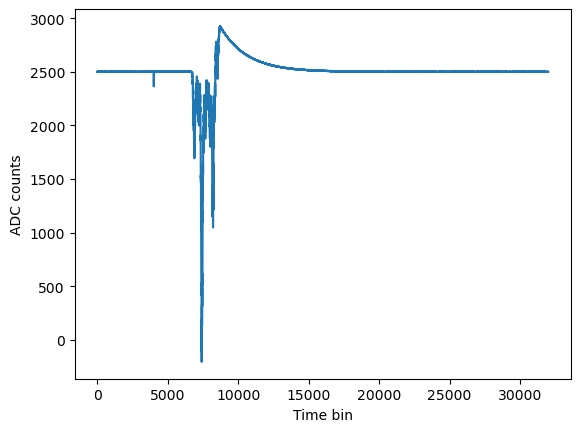

In [42]:
# Plot a PMT waveform
event = 0
pmt = 0
plt.plot(pmtrwf[event, pmt])
plt.xlabel('Time bin')
plt.ylabel('ADC counts')

Text(0, 0.5, 'ADC counts')

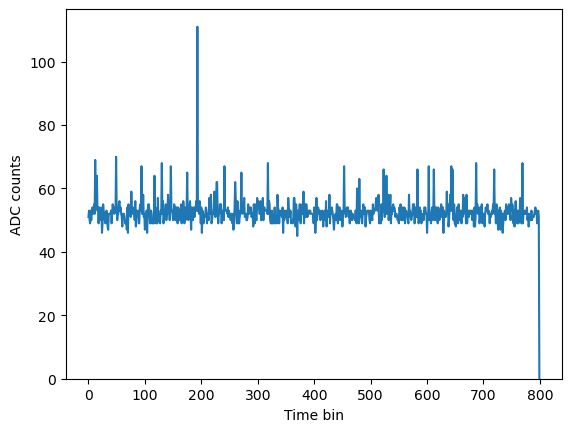

In [43]:
# Plot a SiPM waveform
event = 0
sipm = 0
plt.plot(sipmrwf[event, sipm])
plt.ylim(bottom=0)
plt.xlabel('Time bin')
plt.ylabel('ADC counts')

Text(0, 0.5, 'ADC counts per SiPM')

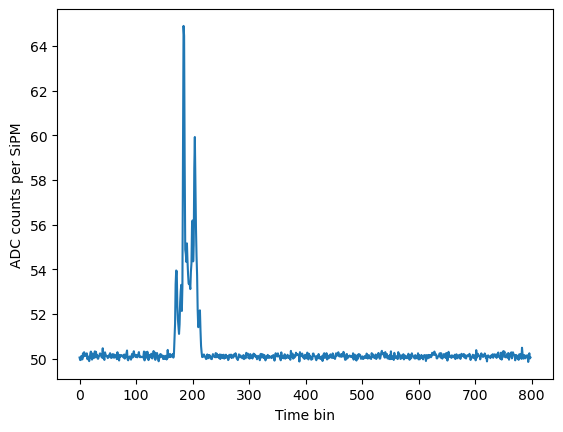

In [48]:
# Plot waveform for the event summed over all SiPMs
event = 0
n_sipm = sipmrwf.shape[1]
# Removing last point because it is always zero
plt.plot(np.sum(sipmrwf[event], axis=0)[:-1] / n_sipm)
plt.xlabel('Time bin')
plt.ylabel('ADC counts per SiPM')
